In [2]:
# Import libraries
import numpy as np
import pandas as pd
import os
import sys
sys.path.append(os.path.abspath('/Users/idrees/Code/govxs/'))
from model.VotingModel import VotingModel
from model.EvalMetrics import EvalMetrics

# Add the directory containing the VotingModel to the Python path

 # Import libraries
import numpy as np
import pandas as pd

from model.VotingRules import VotingRules

# Initialize simulation parameters
num_voters = 144
num_projects = 600
total_op_tokens = 30e6
num_rounds = 100
voter_type = 'random_uniform_model'
quorum=17
min_amount_threshold=1500
# Initialize the model
model = VotingModel(voter_type=voter_type, num_voters=num_voters, num_projects=num_projects, total_op_tokens=total_op_tokens)

# Add custom voting rules if any OR just simply add new voting rule in VotingRules.py class
# Example:
# model.add_voting_rule("custom_rule", custom_rule_function)

# Initialize the evaluation metrics
eval_metrics = EvalMetrics(model)

/Users/idrees/Code/govxs/agents/VoterAgent.py:7: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


# Evaluate Gini Index

In [3]:

gini_results = eval_metrics.evaluate_gini_index(num_rounds)
print("Gini Index Results:")
gini_results.head(100)

Gini Index Results:


,round,mean_aggregation_gini_index,median_aggregation_gini_index,quadratic_aggregation_gini_index,quadratic_aggregation_round1_gini_index
0,1,0.045317,0.064386,0.022776,0.022776
1,2,0.045909,0.066588,0.023253,0.023253
2,3,0.046186,0.062758,0.023540,0.023540
3,4,0.046521,0.064797,0.023565,0.023565
4,5,0.045530,0.066782,0.023372,0.023372
...,...,...,...,...,...
95,96,0.046299,0.062954,0.023325,0.023325
96,97,0.044675,0.065084,0.022757,0.022757
97,98,0.045163,0.064101,0.022485,0.022485
98,99,0.048808,0.069351,0.024578,0.024578


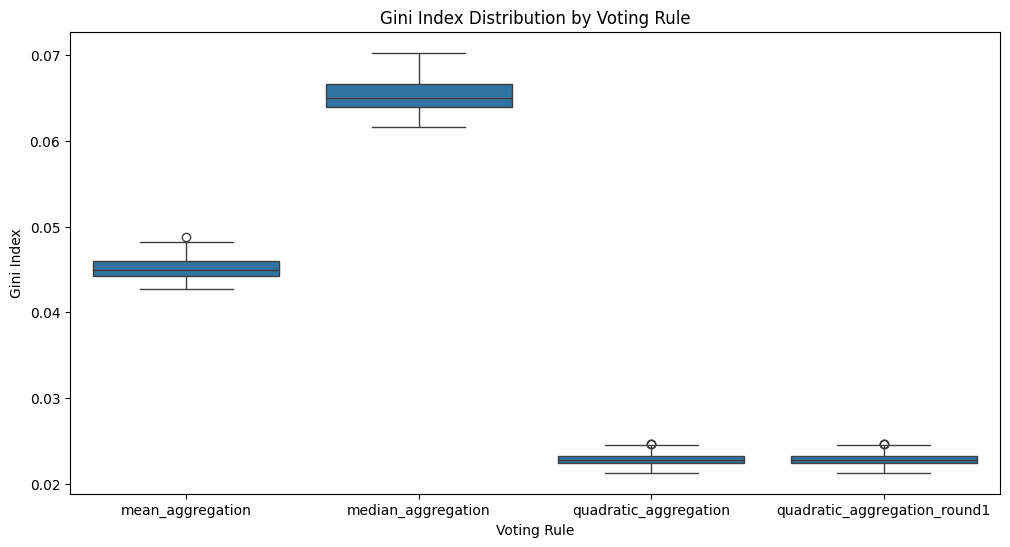

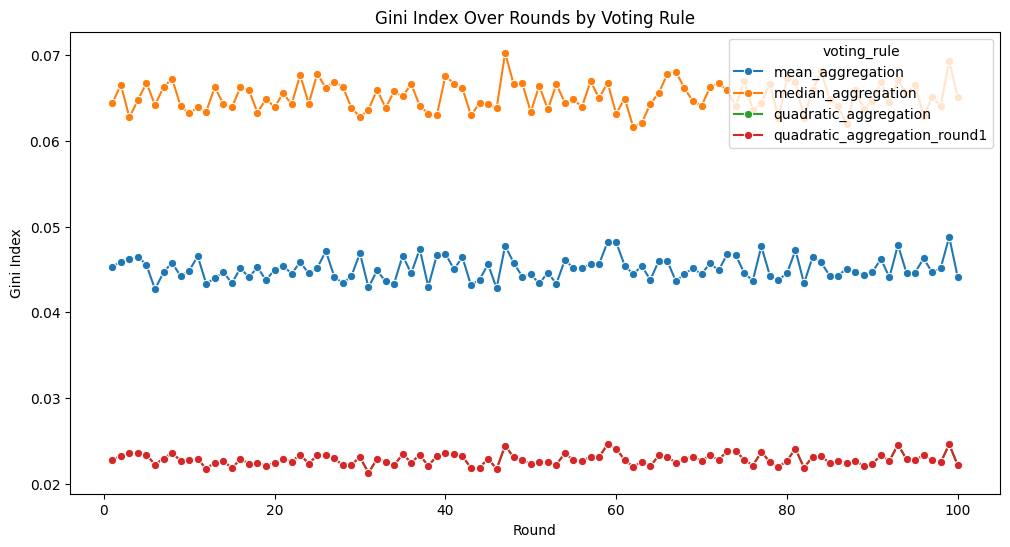

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for box plot
gini_results_long = gini_results.melt(id_vars=['round'], var_name='voting_rule', value_name='gini_index')
gini_results_long['voting_rule'] = gini_results_long['voting_rule'].str.replace('_gini_index', '')

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='voting_rule', y='gini_index', data=gini_results_long)
plt.title('Gini Index Distribution by Voting Rule')
plt.xlabel('Voting Rule')
plt.ylabel('Gini Index')
plt.show()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='round', y='gini_index', hue='voting_rule', data=gini_results_long, marker='o')
plt.title('Gini Index Over Rounds by Voting Rule')
plt.xlabel('Round')
plt.ylabel('Gini Index')
plt.show()


# Evaluate Alignment with Ground Truth

In [6]:



alignment_results = eval_metrics.evaluate_alignment(num_rounds)
print("Alignment Results:")
alignment_results.head(100)



Alignment Results:


,round,mean_aggregation_hamming_distance,median_aggregation_hamming_distance,quadratic_aggregation_hamming_distance,quadratic_aggregation_round1_hamming_distance
0,1,131,130,130,130
1,2,132,134,131,131
2,3,129,123,130,130
3,4,136,131,137,137
4,5,134,134,133,133
...,...,...,...,...,...
95,96,133,125,135,135
96,97,126,122,124,124
97,98,137,139,135,135
98,99,131,127,132,132


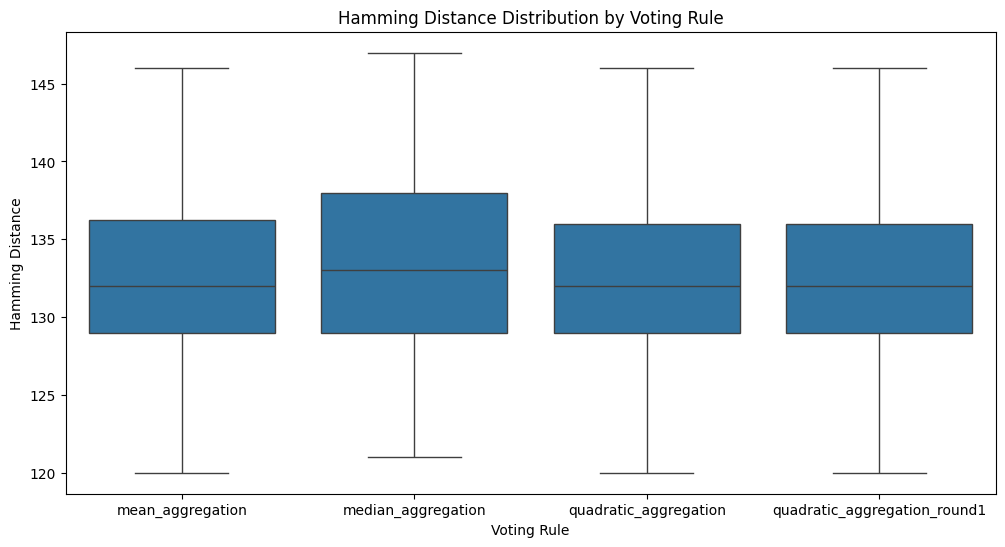

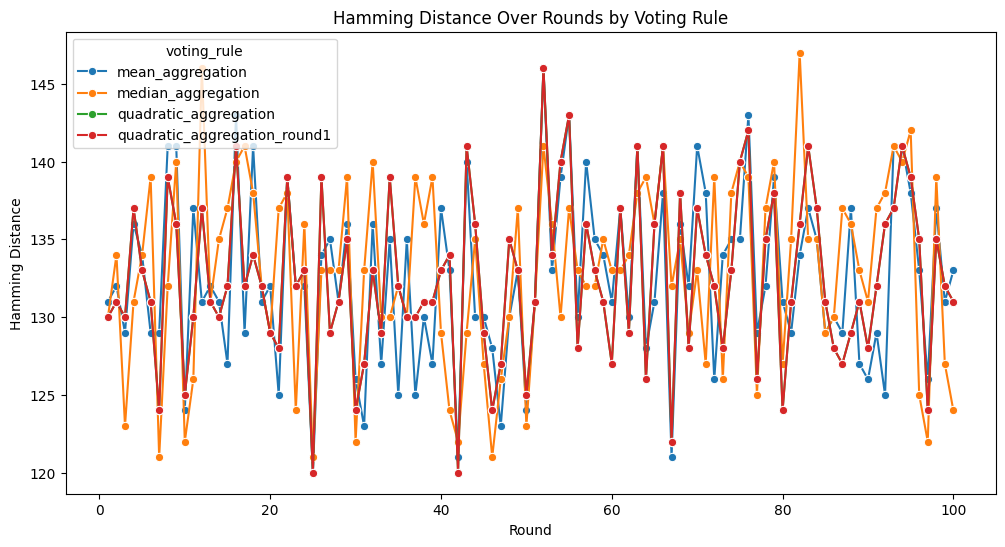

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
alignment_results_long = alignment_results.melt(id_vars=['round'], var_name='voting_rule', value_name='hamming_distance')
alignment_results_long['voting_rule'] = alignment_results_long['voting_rule'].str.replace('_hamming_distance', '')

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='voting_rule', y='hamming_distance', data=alignment_results_long)
plt.title('Hamming Distance Distribution by Voting Rule')
plt.xlabel('Voting Rule')
plt.ylabel('Hamming Distance')
plt.show()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='round', y='hamming_distance', hue='voting_rule', data=alignment_results_long, marker='o')
plt.title('Hamming Distance Over Rounds by Voting Rule')
plt.xlabel('Round')
plt.ylabel('Hamming Distance')
plt.show()


In [8]:
def calculate_alignment_metrics(alignment_results):
    metrics = {
        "voting_rule": [],
        "mean_hamming_distance": [],
        "std_hamming_distance": [],
        "min_hamming_distance": [],
        "max_hamming_distance": []
    }
    
    for voting_rule in model.voting_rules.keys():
        hamming_distances = alignment_results[f"{voting_rule}_hamming_distance"]
        metrics["voting_rule"].append(voting_rule)
        metrics["mean_hamming_distance"].append(np.mean(hamming_distances))
        metrics["std_hamming_distance"].append(np.std(hamming_distances))
        metrics["min_hamming_distance"].append(np.min(hamming_distances))
        metrics["max_hamming_distance"].append(np.max(hamming_distances))
    
    return pd.DataFrame(metrics)

# Calculate metrics
alignment_metrics = calculate_alignment_metrics(alignment_results)

alignment_metrics


,voting_rule,mean_hamming_distance,std_hamming_distance,min_hamming_distance,max_hamming_distance
0,mean_aggregation,132.48,5.527169,120,146
1,median_aggregation,133.00,5.949790,121,147
2,quadratic_aggregation,132.50,5.292447,120,146
3,quadratic_aggregation_round1,132.50,5.292447,120,146


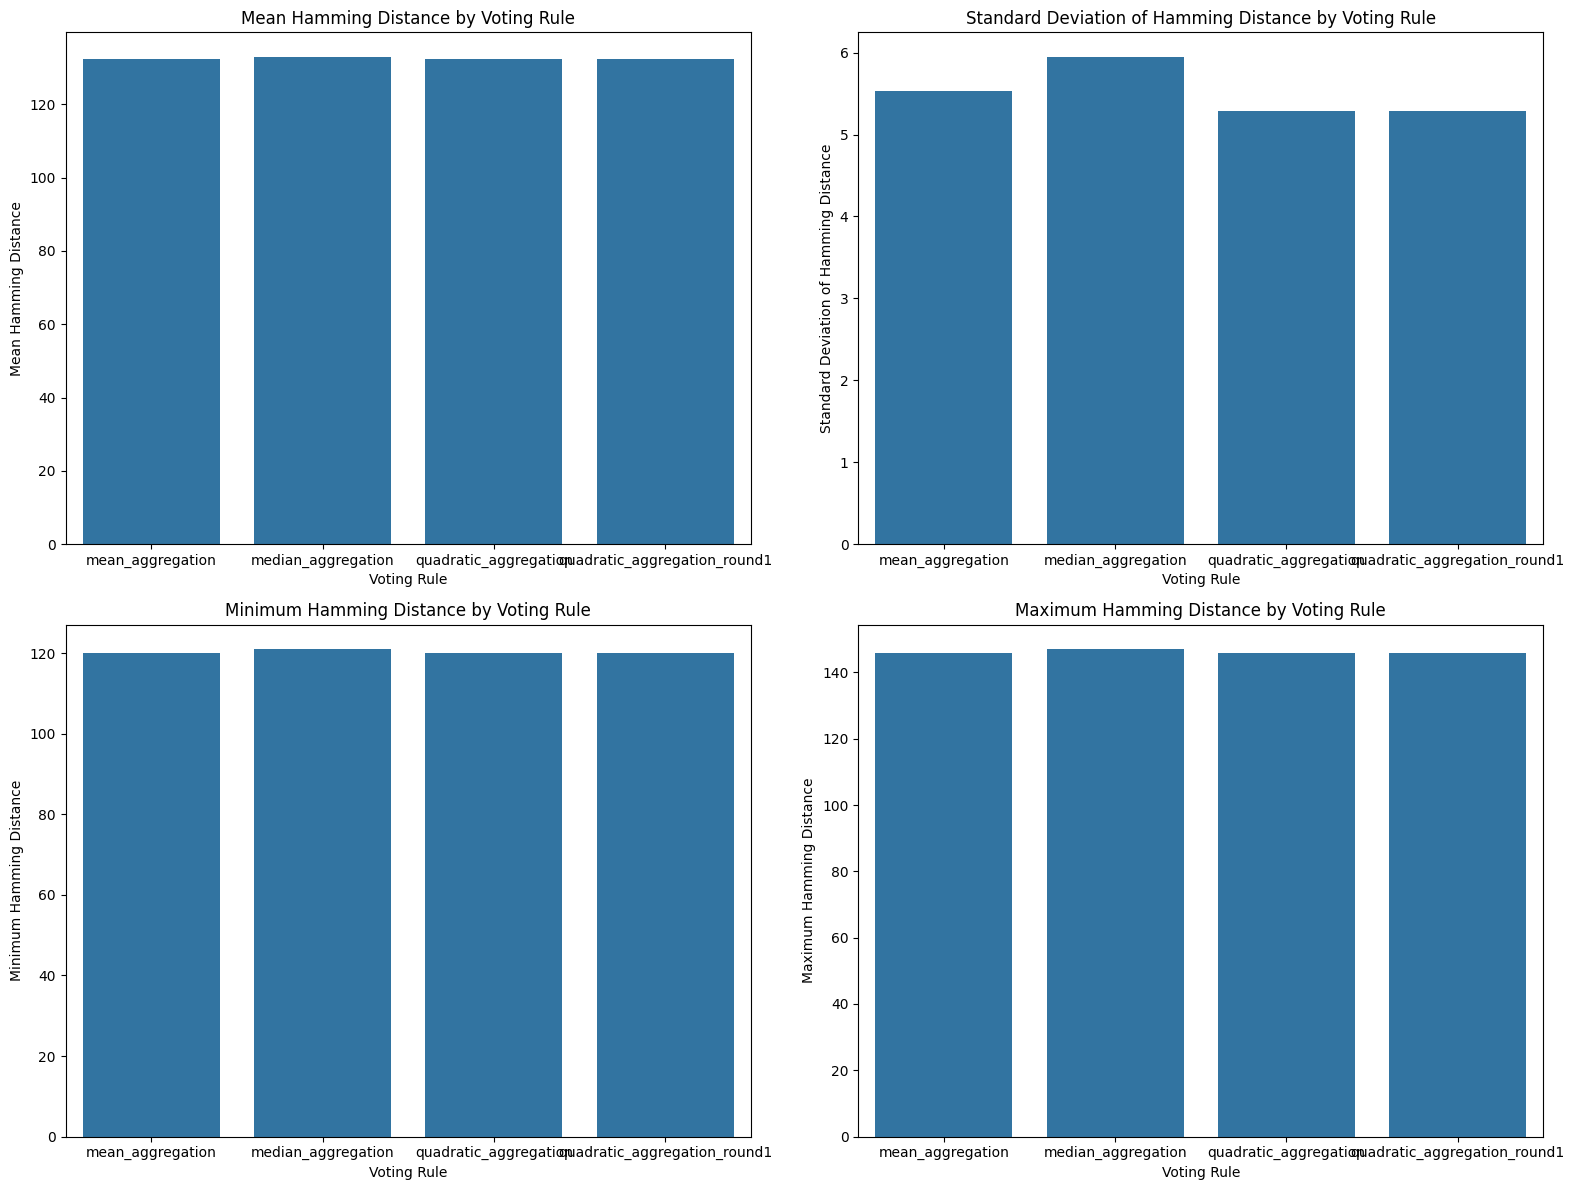

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Mean Hamming Distance
sns.barplot(x='voting_rule', y='mean_hamming_distance', data=alignment_metrics, ax=axes[0, 0])
axes[0, 0].set_title('Mean Hamming Distance by Voting Rule')
axes[0, 0].set_xlabel('Voting Rule')
axes[0, 0].set_ylabel('Mean Hamming Distance')

# Standard Deviation of Hamming Distance
sns.barplot(x='voting_rule', y='std_hamming_distance', data=alignment_metrics, ax=axes[0, 1])
axes[0, 1].set_title('Standard Deviation of Hamming Distance by Voting Rule')
axes[0, 1].set_xlabel('Voting Rule')
axes[0, 1].set_ylabel('Standard Deviation of Hamming Distance')

# Minimum Hamming Distance
sns.barplot(x='voting_rule', y='min_hamming_distance', data=alignment_metrics, ax=axes[1, 0])
axes[1, 0].set_title('Minimum Hamming Distance by Voting Rule')
axes[1, 0].set_xlabel('Voting Rule')
axes[1, 0].set_ylabel('Minimum Hamming Distance')

# Maximum Hamming Distance
sns.barplot(x='voting_rule', y='max_hamming_distance', data=alignment_metrics, ax=axes[1, 1])
axes[1, 1].set_title('Maximum Hamming Distance by Voting Rule')
axes[1, 1].set_xlabel('Voting Rule')
axes[1, 1].set_ylabel('Maximum Hamming Distance')

plt.tight_layout()
plt.show()


# Evaluate Social Welfare

In [10]:

social_welfare_results = eval_metrics.evaluate_social_welfare(num_rounds)
#social_welfare_results = eval_metrics.evaluate_social_welfare_1(num_rounds)
print("Social Welfare Results:")
social_welfare_results.head(100)

Social Welfare Results:


,round,mean_aggregation_social_welfare,median_aggregation_social_welfare,quadratic_aggregation_social_welfare,quadratic_aggregation_round1_social_welfare
0,1,2.193199e+07,2.194260e+07,2.194735e+07,2.096965e+07
1,2,2.208353e+07,2.209784e+07,2.209445e+07,2.102004e+07
2,3,2.195260e+07,2.196530e+07,2.196469e+07,2.094412e+07
3,4,2.191345e+07,2.191923e+07,2.192551e+07,2.095056e+07
4,5,2.198013e+07,2.199083e+07,2.199621e+07,2.098926e+07
...,...,...,...,...,...
95,96,2.194297e+07,2.196450e+07,2.195856e+07,2.096565e+07
96,97,2.202850e+07,2.203879e+07,2.203977e+07,2.099740e+07
97,98,2.200520e+07,2.201288e+07,2.201691e+07,2.099783e+07
98,99,2.197014e+07,2.199154e+07,2.197689e+07,2.099467e+07


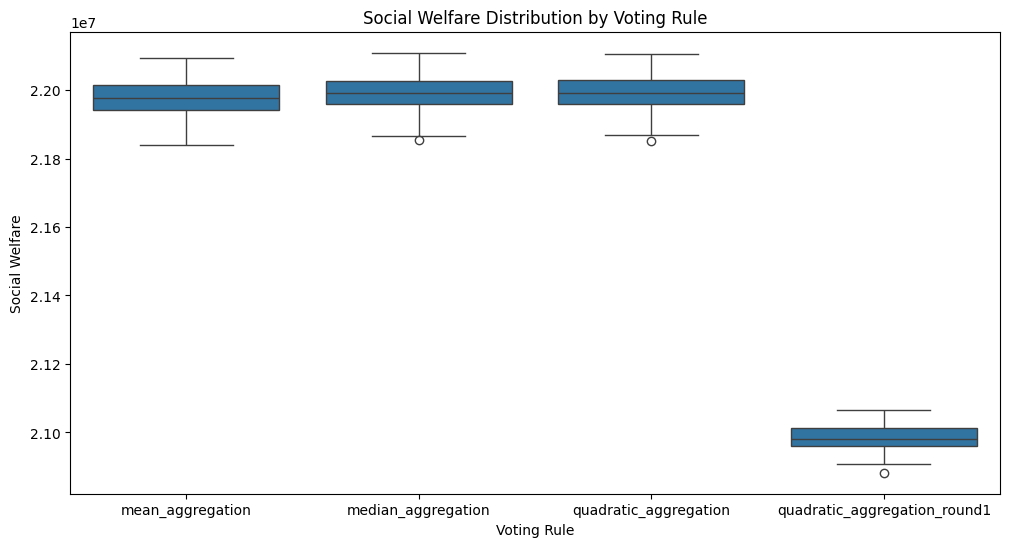

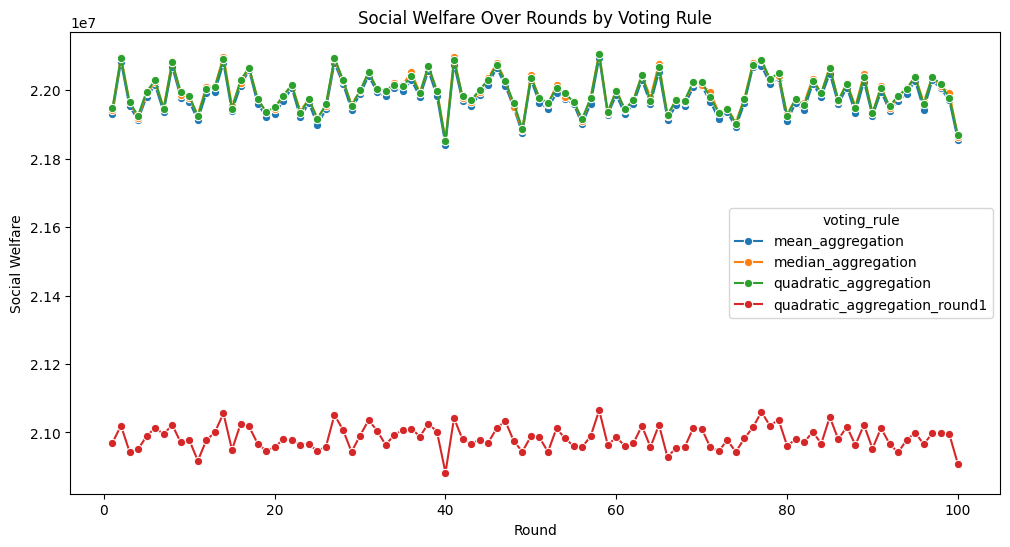

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
social_welfare_results_long = social_welfare_results.melt(id_vars=['round'], var_name='voting_rule', value_name='social_welfare')
social_welfare_results_long['voting_rule'] = social_welfare_results_long['voting_rule'].str.replace('_social_welfare', '')

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='voting_rule', y='social_welfare', data=social_welfare_results_long)
plt.title('Social Welfare Distribution by Voting Rule')
plt.xlabel('Voting Rule')
plt.ylabel('Social Welfare')
plt.show()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='round', y='social_welfare', hue='voting_rule', data=social_welfare_results_long, marker='o')
plt.title('Social Welfare Over Rounds by Voting Rule')
plt.xlabel('Round')
plt.ylabel('Social Welfare')
plt.show()


# Evaluate Resistance to Control

In [13]:



control_results = eval_metrics.evaluate_control(num_rounds)
print("Control Results:")
control_results.head(100)

# Display the results


Control Results:


,voting_rule,add_projects,remove_projects,add_voters,remove_voters
0,mean_aggregation,0.001618,1.280101e+05,0.005275,21792.376937
1,median_aggregation,0.002479,7.389780e+05,116653.272617,171452.054348
2,quadratic_aggregation,4.898187,9.685213e+04,20.992999,4983.625297
3,quadratic_aggregation_round1,0.000000,6.748562e+04,23.408403,71517.255007
4,mean_aggregation,0.001675,4.243010e+05,0.005973,156911.605796
...,...,...,...,...,...
95,quadratic_aggregation_round1,0.000000,2.276106e+05,21.885694,98985.707783
96,mean_aggregation,0.001563,1.659206e+06,0.002211,173288.535416
97,median_aggregation,0.002975,1.307699e+04,25098.906644,423839.745416
98,quadratic_aggregation,5.205396,3.677657e+05,35.061717,41077.597107


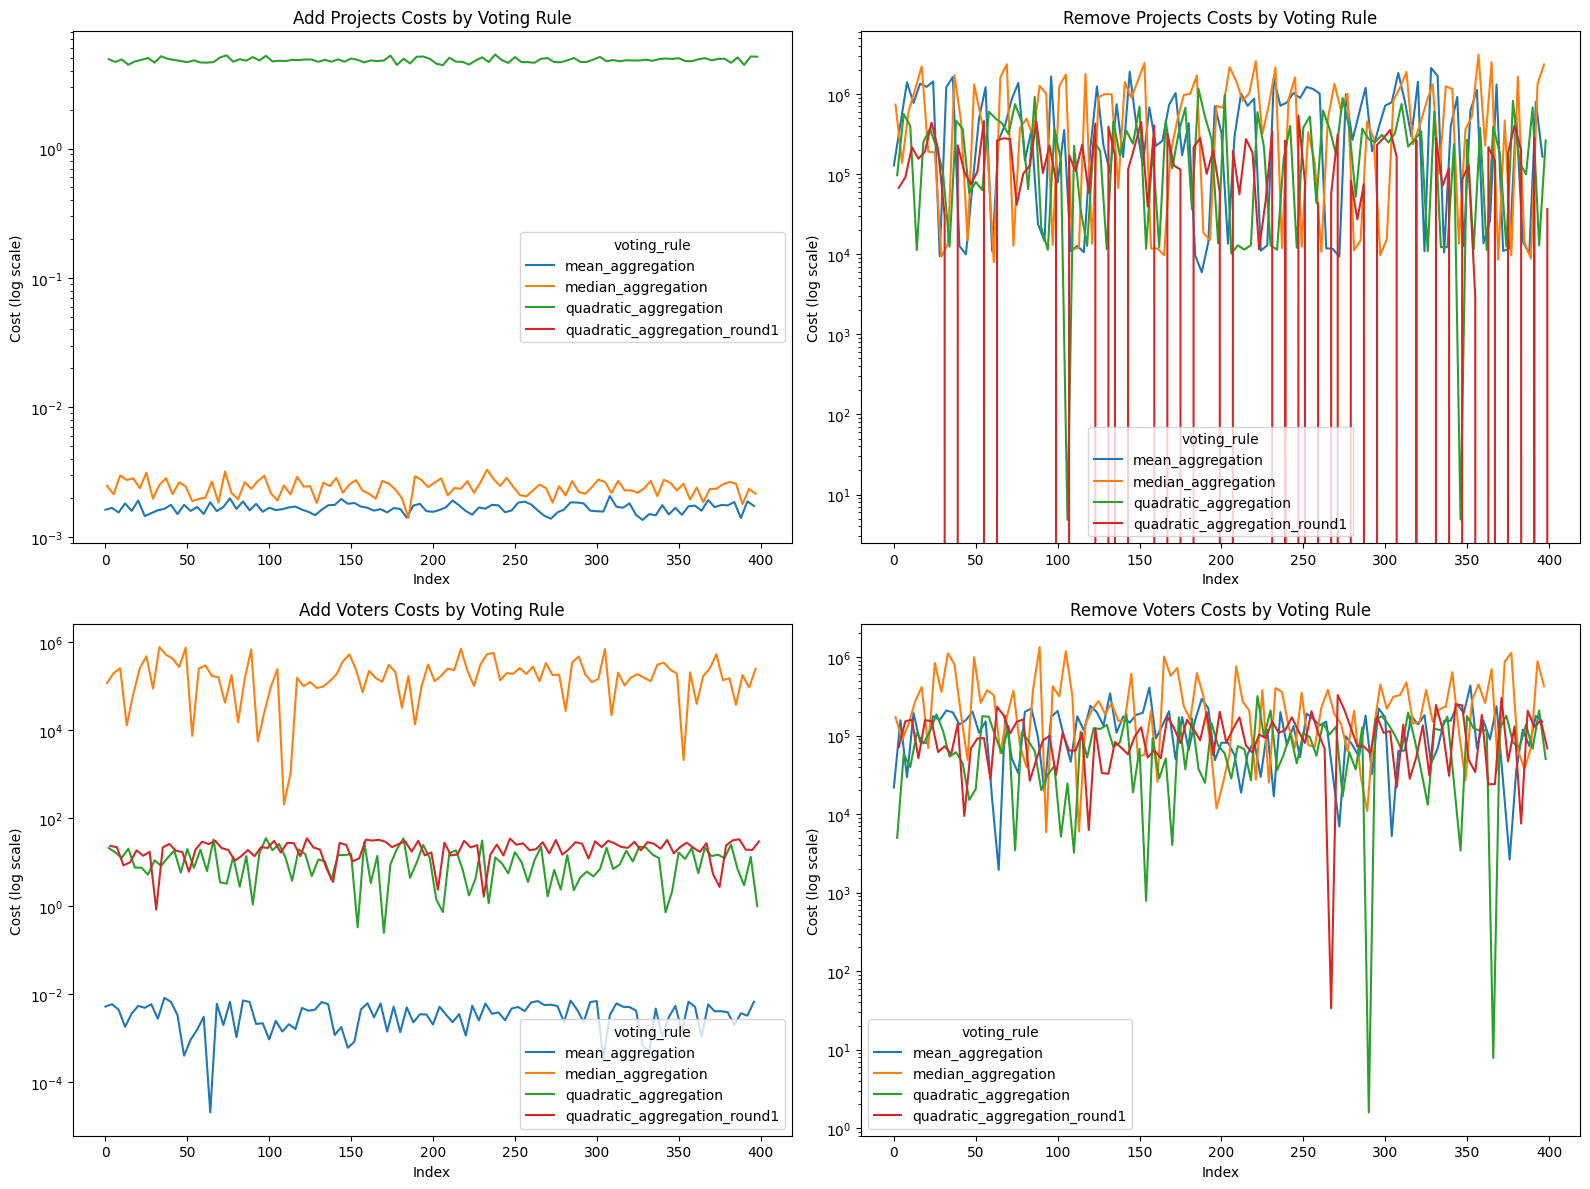

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plotting for each control strategy
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Line Plot for add_projects
sns.lineplot(x=control_results.index, y='add_projects', hue='voting_rule', data=control_results, ax=axes[0, 0])
axes[0, 0].set_yscale('log')
axes[0, 0].set_title('Add Projects Costs by Voting Rule')
axes[0, 0].set_xlabel('Index')
axes[0, 0].set_ylabel('Cost (log scale)')

# Line Plot for remove_projects
sns.lineplot(x=control_results.index, y='remove_projects', hue='voting_rule', data=control_results, ax=axes[0, 1])
axes[0, 1].set_yscale('log')
axes[0, 1].set_title('Remove Projects Costs by Voting Rule')
axes[0, 1].set_xlabel('Index')
axes[0, 1].set_ylabel('Cost (log scale)')

# Line Plot for add_voters
sns.lineplot(x=control_results.index, y='add_voters', hue='voting_rule', data=control_results, ax=axes[1, 0])
axes[1, 0].set_yscale('log')
axes[1, 0].set_title('Add Voters Costs by Voting Rule')
axes[1, 0].set_xlabel('Index')
axes[1, 0].set_ylabel('Cost (log scale)')

# Line Plot for remove_voters
sns.lineplot(x=control_results.index, y='remove_voters', hue='voting_rule', data=control_results, ax=axes[1, 1])
axes[1, 1].set_yscale('log')
axes[1, 1].set_title('Remove Voters Costs by Voting Rule')
axes[1, 1].set_xlabel('Index')
axes[1, 1].set_ylabel('Cost (log scale)')

plt.tight_layout()
plt.show()


In [16]:
# Analyze the results
def analyze_results(df):
    analysis = df.groupby('voting_rule').describe().transpose()
    return analysis

analysis_results = analyze_results(control_results)
analysis_results

voting_rule            mean_aggregation  median_aggregation  \
add_projects    count      1.000000e+02        1.000000e+02   
                mean       1.669205e-03        2.411560e-03   
                std        1.430105e-04        3.473499e-04   
                min        1.350298e-03        1.404037e-03   
                25%        1.577381e-03        2.151384e-03   
                50%        1.670601e-03        2.420599e-03   
                75%        1.764709e-03        2.657827e-03   
                max        2.068003e-03        3.303029e-03   
remove_projects count      1.000000e+02        1.000000e+02   
                mean       5.741872e+05        7.699949e+05   
                std        5.571102e+05        7.624377e+05   
                min        5.957810e+03        7.932083e+03   
                25%        2.146527e+04        1.773886e+04   
                50%        4.052021e+05        5.296932e+05   
                75%        9.991075e+05        1.258917e+06   
                max        2.117296e+06        3.108877e+06   
add_voters      count      1.000000e+02        1.000000e+02   
                mean       3.859339e-03        2.142349e+05   
                std        2.072223e-03        1.717158e+05   
                min        2.079760e-05        2.038202e+02   
                25%        2.084481e-03        1.021879e+05   
                50%        3.897271e-03        1.764324e+05   
                75%        5.466010e-03        2.537096e+05   
                max        8.294107e-03        7.638318e+05   
remove_voters   count      1.000000e+02        1.000000e+02   
                mean       1.285374e+05        3.092594e+05   
                std        8.391145e+04        2.985695e+05   
                min        1.946885e+03        5.883241e+03   
                25%        6.218938e+04        7.518030e+04   
                50%        1.348891e+05        2.179834e+05   
                75%        1.792048e+05        3.840001e+05   
                max        4.340829e+05        1.339790e+06   

voting_rule            quadratic_aggregation  quadratic_aggregation_round1  
add_projects    count           1.000000e+02                    100.000000  
                mean            4.820078e+00                      0.000000  
                std             1.947568e-01                      0.000000  
                min             4.401062e+00                      0.000000  
                25%             4.674131e+00                      0.000000  
                50%             4.801548e+00                      0.000000  
                75%             4.937280e+00                      0.000000  
                max             5.316512e+00                      0.000000  
remove_projects count           1.000000e+02                    100.000000  
                mean            2.752562e+05                 146004.148881  
                std             2.597245e+05                 137559.600480  
                min             4.813169e+00                      0.000000  
                25%             3.271582e+04                  23358.185969  
                50%             2.386252e+05                 108378.637340  
                75%             3.936278e+05                 229329.006209  
                max             1.158882e+06                 539972.362014  
add_voters      count           1.000000e+02                    100.000000  
                mean            1.183733e+01                     21.019481  
                std             8.267976e+00                      8.118897  
                min             2.476961e-01                      0.834569  
                25%             4.822408e+00                     15.890470  
                50%             1.131690e+01                     21.604685  
                75%             1.672060e+01                     27.569295  
                max             3.506172e+01                     34.8595

Resistance: The quadratic aggregation method shows higher resistance to adding projects but lower resistance to removing projects compared to mean and median aggregation methods. Median aggregation shows the highest resistance to removing projects and adding voters.
Costs: Removing projects and voters generally incurs higher costs than adding them, indicating greater resistance to these control strategies.
Variability: High standard deviations and max values indicate significant variability in the costs, suggesting that the effectiveness of control strategies can vary widely depending on specific scenarios.

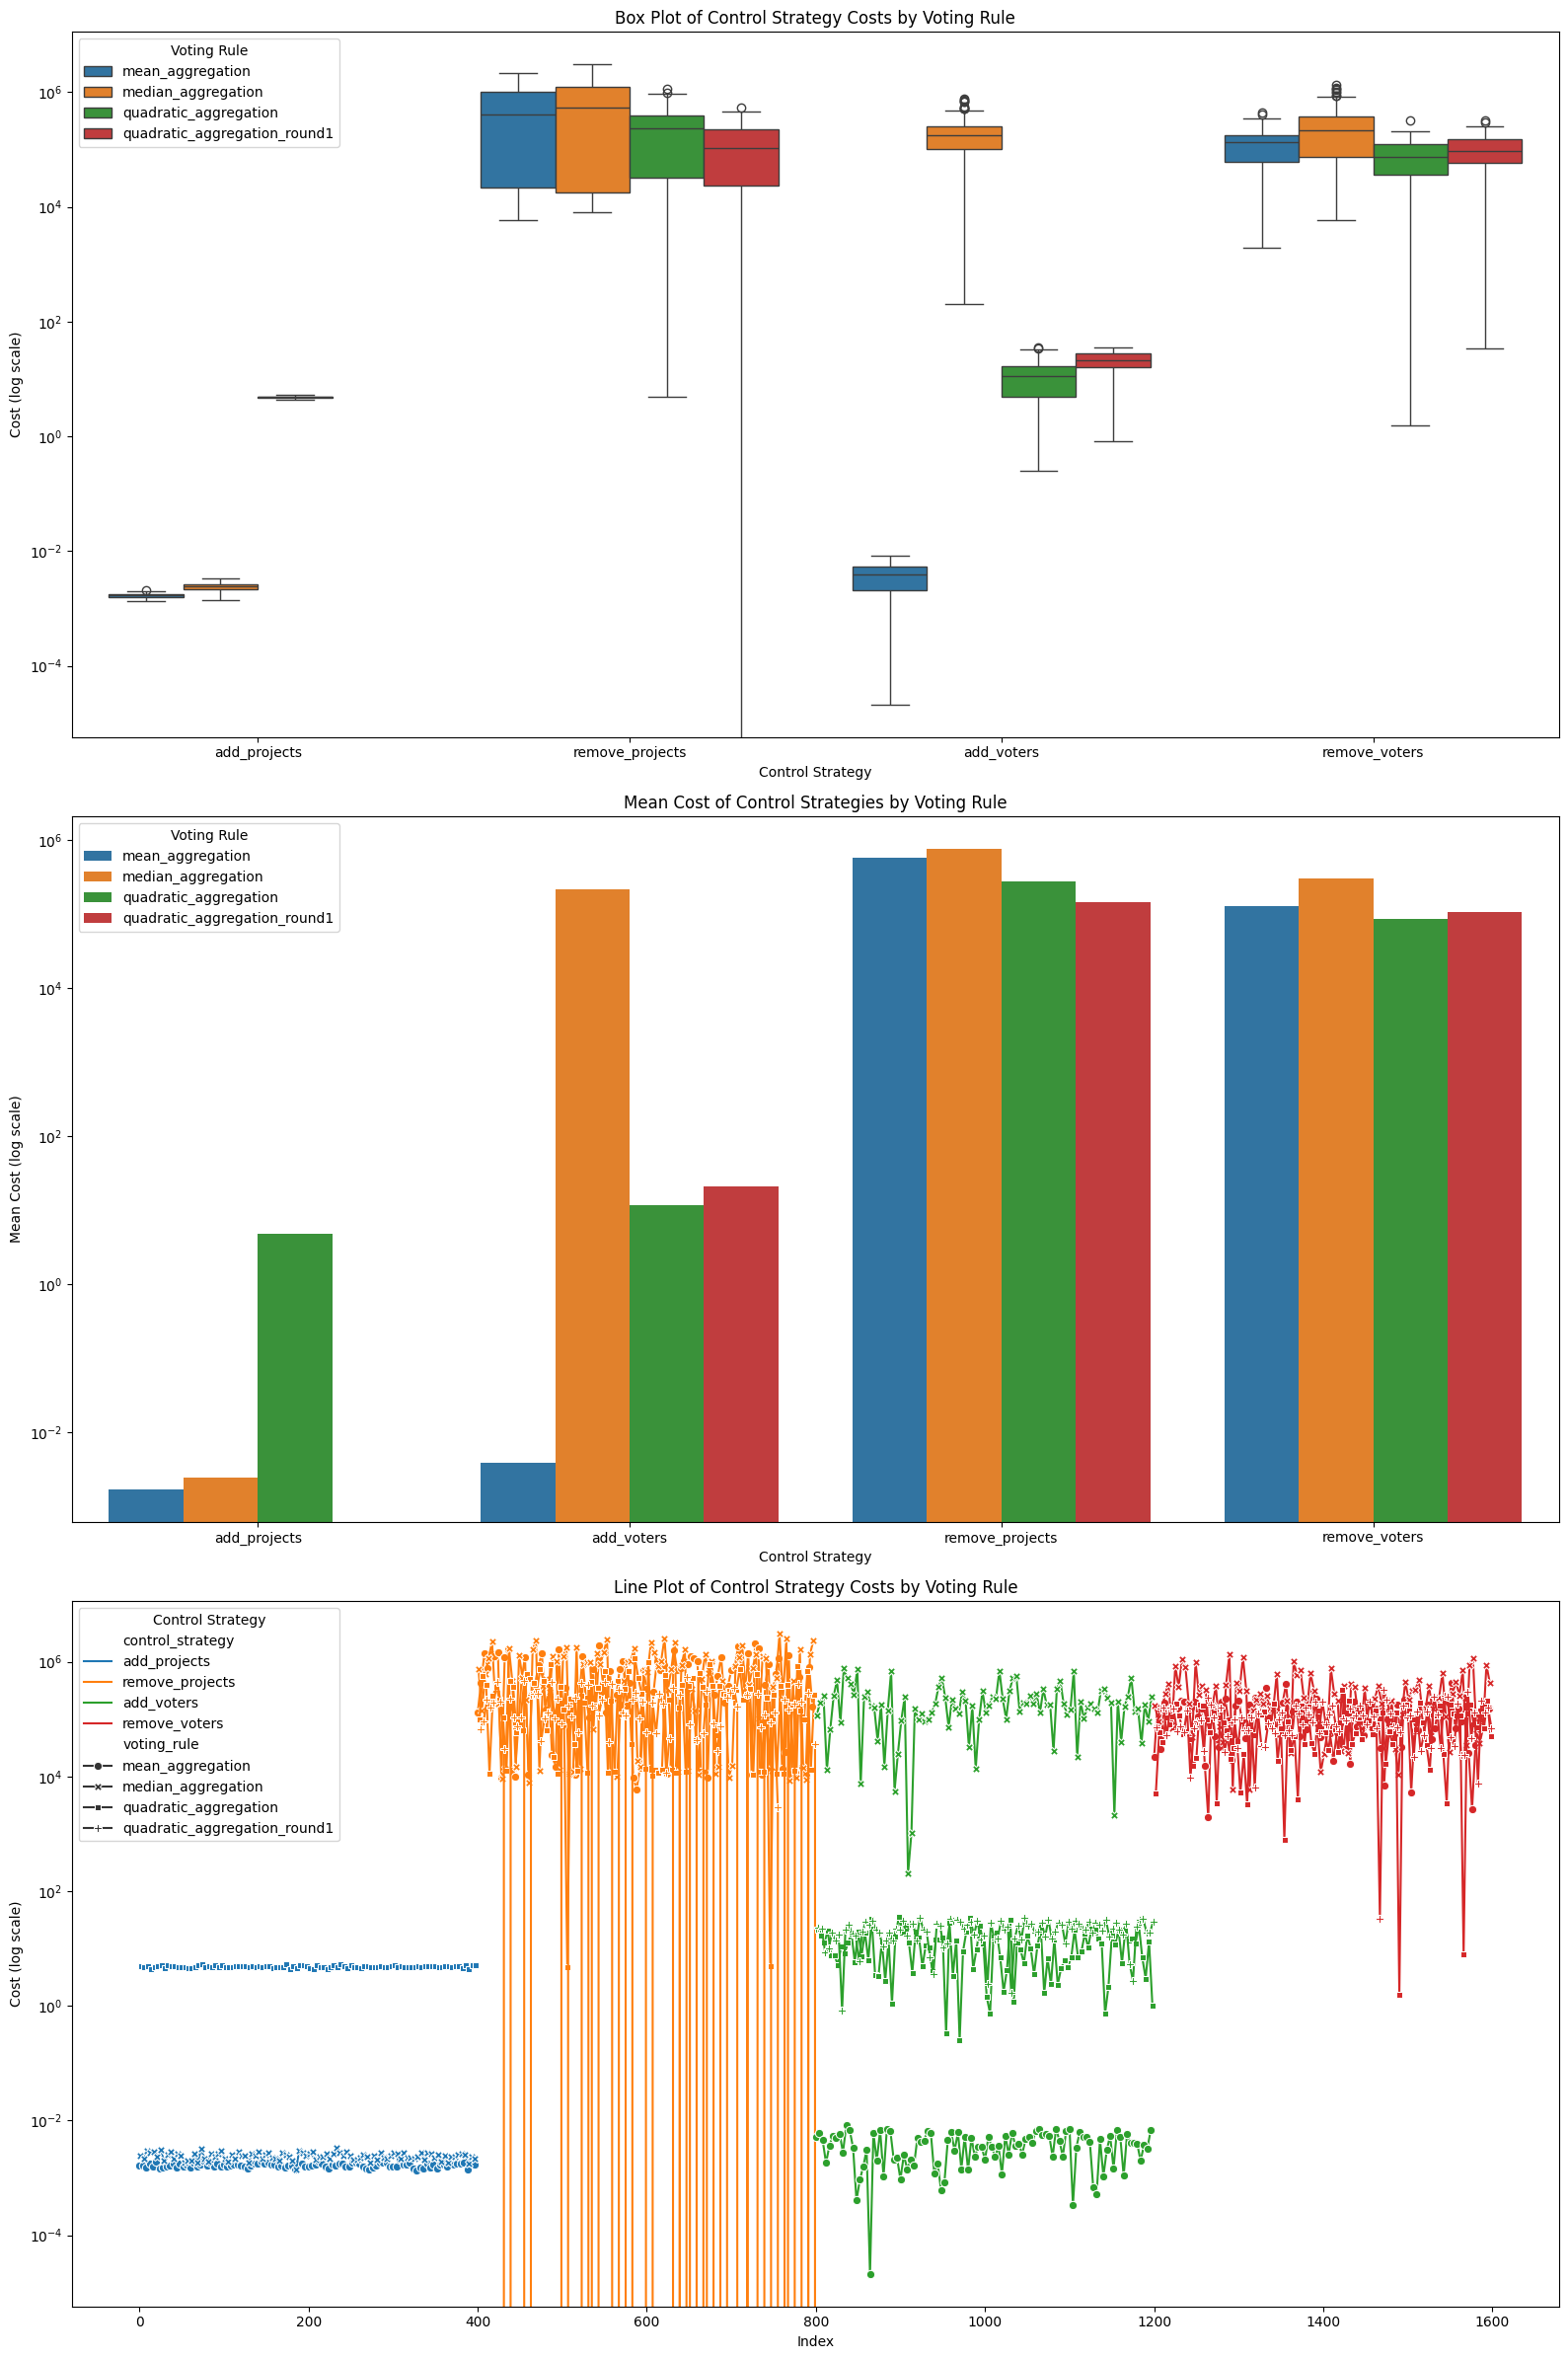

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming `control_results_raw` is the DataFrame with the provided data

# Prepare data for plotting
control_results_long = control_results.melt(id_vars=['voting_rule'], var_name='control_strategy', value_name='cost')

# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 1, figsize=(16, 24))

# Box Plot
sns.boxplot(x='control_strategy', y='cost', hue='voting_rule', data=control_results_long, ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_title('Box Plot of Control Strategy Costs by Voting Rule')
axes[0].set_xlabel('Control Strategy')
axes[0].set_ylabel('Cost (log scale)')
axes[0].legend(title='Voting Rule')

# Bar Plot for Mean Costs
mean_data = control_results_long.groupby(['control_strategy', 'voting_rule']).mean().reset_index()
sns.barplot(x='control_strategy', y='cost', hue='voting_rule', data=mean_data, ax=axes[1])
axes[1].set_yscale('log')
axes[1].set_title('Mean Cost of Control Strategies by Voting Rule')
axes[1].set_xlabel('Control Strategy')
axes[1].set_ylabel('Mean Cost (log scale)')
axes[1].legend(title='Voting Rule')

# Line Plot for Individual Data Points
sns.lineplot(x='index', y='cost', hue='control_strategy', style='voting_rule', markers=True, dashes=False, data=control_results_long.reset_index(), ax=axes[2])
axes[2].set_yscale('log')
axes[2].set_title('Line Plot of Control Strategy Costs by Voting Rule')
axes[2].set_xlabel('Index')
axes[2].set_ylabel('Cost (log scale)')
axes[2].legend(title='Control Strategy')

plt.tight_layout()
plt.show()


/var/folders/jc/585j6n692cs_9w0hfdcpf43w0000gn/T/ipykernel_60560/2060427186.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='control_strategy', y='mean_cost', hue='voting_rule', data=mean_std_data, ax=axes[1], ci=None)


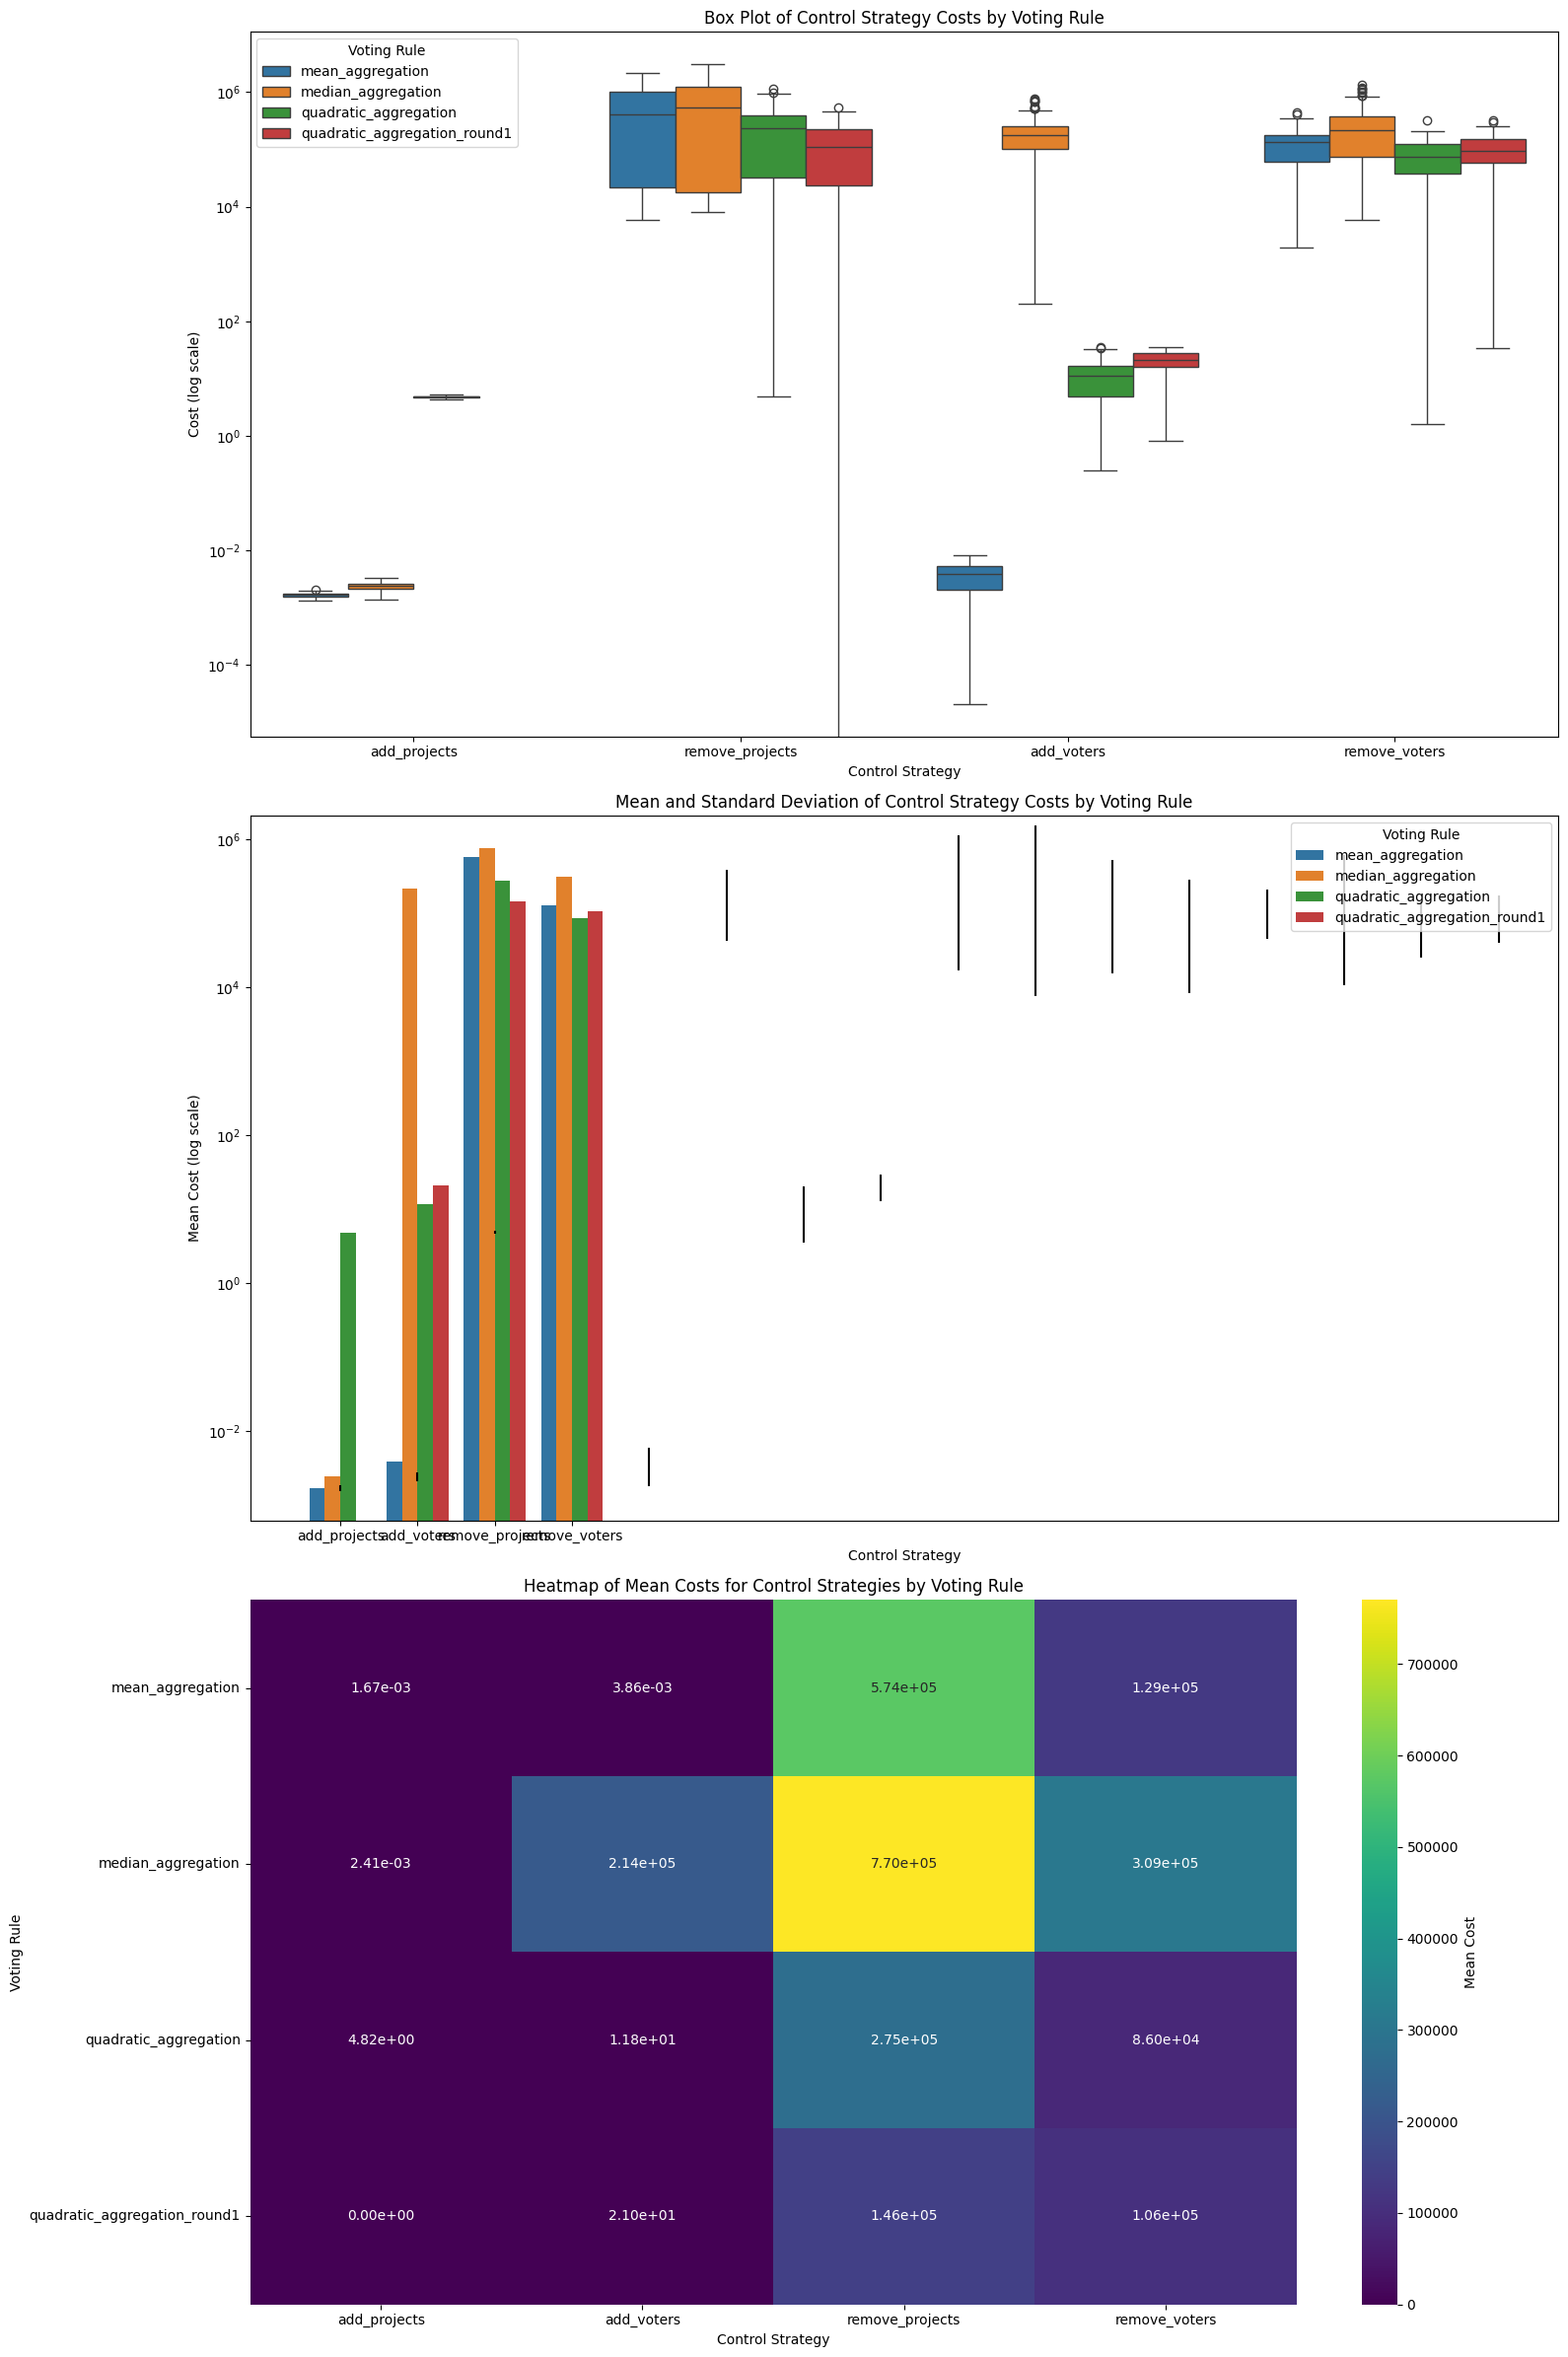

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Preparing data for enhanced visualization
control_results_long = control_results.melt(id_vars=['voting_rule'], var_name='control_strategy', value_name='cost')

# Creating a figure with multiple subplots
fig, axes = plt.subplots(3, 1, figsize=(16, 24))

# Box Plot
sns.boxplot(x='control_strategy', y='cost', hue='voting_rule', data=control_results_long, ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_title('Box Plot of Control Strategy Costs by Voting Rule')
axes[0].set_xlabel('Control Strategy')
axes[0].set_ylabel('Cost (log scale)')
axes[0].legend(title='Voting Rule')

# Bar Plot for Mean and Standard Deviation
mean_std_data = control_results_long.groupby(['control_strategy', 'voting_rule']).agg(['mean', 'std']).reset_index()

# Flatten the MultiIndex
mean_std_data.columns = ['_'.join(col).strip() for col in mean_std_data.columns.values]
mean_std_data = mean_std_data.rename(columns={
    'control_strategy_': 'control_strategy', 
    'voting_rule_': 'voting_rule', 
    'cost_mean': 'mean_cost', 
    'cost_std': 'std_cost'
})

sns.barplot(x='control_strategy', y='mean_cost', hue='voting_rule', data=mean_std_data, ax=axes[1], ci=None)
axes[1].set_yscale('log')
for i, row in mean_std_data.iterrows():
    axes[1].errorbar(i, row['mean_cost'], yerr=row['std_cost'], fmt='none', c='black')
axes[1].set_title('Mean and Standard Deviation of Control Strategy Costs by Voting Rule')
axes[1].set_xlabel('Control Strategy')
axes[1].set_ylabel('Mean Cost (log scale)')
axes[1].legend(title='Voting Rule')

# Heatmap for Mean Costs
pivot_table = mean_std_data.pivot_table(index='voting_rule', columns='control_strategy', values='mean_cost')
sns.heatmap(pivot_table, annot=True, fmt=".2e", cmap='viridis', ax=axes[2], cbar_kws={'label': 'Mean Cost'})
axes[2].set_title('Heatmap of Mean Costs for Control Strategies by Voting Rule')
axes[2].set_xlabel('Control Strategy')
axes[2].set_ylabel('Voting Rule')

plt.tight_layout()
plt.show()


# Evaluate Robustness

In [18]:

robustness_results = eval_metrics.evaluate_robustness(num_rounds)
print("Robustness Results:")
robustness_results.head(100)



Robustness Results:


,mean_aggregation_distances,median_aggregation_distances,quadratic_aggregation_distances,quadratic_aggregation_round1_distances,round
0,449.137216,0.000000,41.452141,334.607021,1
1,211.059177,0.000000,462.381220,65.386169,2
2,84.132805,1903.854884,147.086780,10.638356,3
3,268.512163,1484.932193,461.590155,76.267663,4
4,2.200808,0.000000,220.520470,539.160883,5
...,...,...,...,...,...
95,68.945003,1443.135350,231.243469,343.033910,96
96,105.898495,1976.510293,191.050021,238.311320,97
97,1560.027777,297.577144,164.582210,354.611367,98
98,21.747139,841.088449,214.196049,171.072909,99


In [19]:
print(f"Avg Mean L1 Distance: {np.mean(robustness_results['mean_aggregation_distances'])}")
print(f"Avg Median L1 Distance: {np.mean(robustness_results['median_aggregation_distances'])}")
print(f"Avg Quadratic L1 Distance: {np.mean(robustness_results['quadratic_aggregation_distances'])}")

Avg Mean L1 Distance: 305.0416175125046
Avg Median L1 Distance: 580.7967545255457
Avg Quadratic L1 Distance: 328.15874741065136


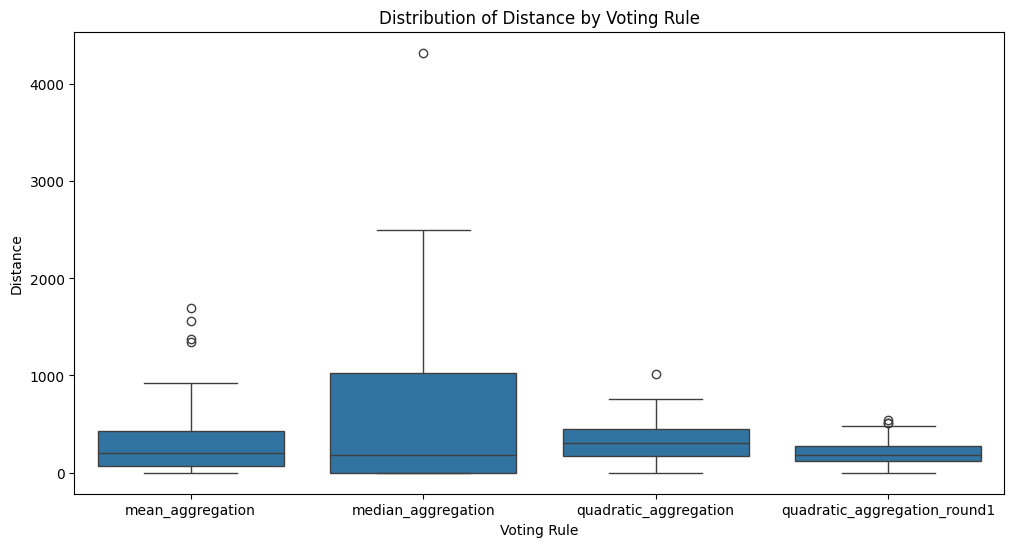

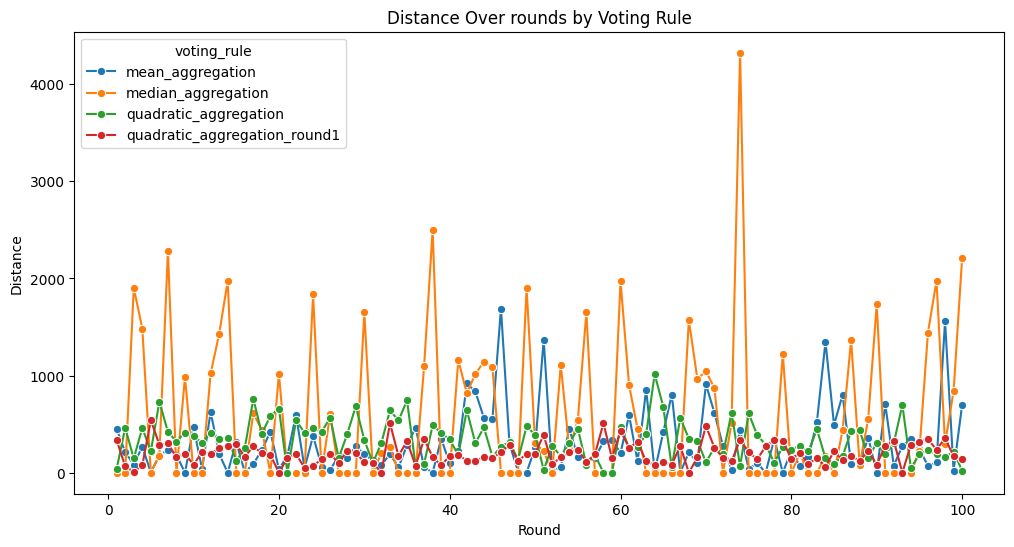

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
robustness_results_long = robustness_results.melt(id_vars=['round'], var_name='voting_rule', value_name='distance')
robustness_results_long['voting_rule'] = robustness_results_long['voting_rule'].str.replace('_distances', '')

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='voting_rule', y='distance', data=robustness_results_long)
plt.title('Distribution of Distance by Voting Rule')
plt.xlabel('Voting Rule')
plt.ylabel('Distance')
plt.show()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='round', y='distance', hue='voting_rule', data=robustness_results_long, marker='o')
plt.title('Distance Over rounds by Voting Rule')
plt.xlabel('Round')
plt.ylabel('Distance')
plt.show()


# Evaluate Group Strategyproofness

In [21]:

group_strategyproofness_results = eval_metrics.evaluate_group_strategyproofness()
print("Group Strategyproofness Results:")
print(group_strategyproofness_results)

Group Strategyproofness Results:
                    voting_rule  group_strategyproof
0              mean_aggregation                False
1            median_aggregation                False
2         quadratic_aggregation                False
3  quadratic_aggregation_round1                False


# Evaluate Bribery Cost

In [27]:
bribery_results = eval_metrics.evaluate_bribery(num_rounds)
print("Bribery Cost Results:")
bribery_results.head(100)

Bribery Cost Calculation Function for quadratic_aggregation_round1 is not defined in EvalMetrics
Bribery Cost Calculation Function for quadratic_aggregation_round1 is not defined in EvalMetrics
Bribery Cost Calculation Function for quadratic_aggregation_round1 is not defined in EvalMetrics
Bribery Cost Calculation Function for quadratic_aggregation_round1 is not defined in EvalMetrics
Bribery Cost Calculation Function for quadratic_aggregation_round1 is not defined in EvalMetrics
Bribery Cost Calculation Function for quadratic_aggregation_round1 is not defined in EvalMetrics
Bribery Cost Calculation Function for quadratic_aggregation_round1 is not defined in EvalMetrics
Bribery Cost Calculation Function for quadratic_aggregation_round1 is not defined in EvalMetrics
Bribery Cost Calculation Function for quadratic_aggregation_round1 is not defined in EvalMetrics
Bribery Cost Calculation Function for quadratic_aggregation_round1 is not defined in EvalMetrics
Bribery Cost Calculation Funct

,round,desired_increase,mean_aggregation_bribery_cost,median_aggregation_bribery_cost,quadratic_aggregation_bribery_cost,quadratic_aggregation_round1_bribery_cost
0,1,10000.0,1440000.0,10000.0,2.350761e+11,0
1,2,20000.0,2880000.0,20000.0,3.999081e+11,0
2,3,30000.0,4320000.0,30000.0,5.397665e+11,0
3,4,40000.0,5760000.0,40000.0,6.271110e+11,0
4,5,50000.0,7200000.0,50000.0,8.142923e+11,0
...,...,...,...,...,...,...
95,96,960000.0,138240000.0,960000.0,2.210942e+13,0
96,97,970000.0,139680000.0,970000.0,2.223447e+13,0
97,98,980000.0,141120000.0,980000.0,2.257465e+13,0
98,99,990000.0,142560000.0,990000.0,2.185737e+13,0


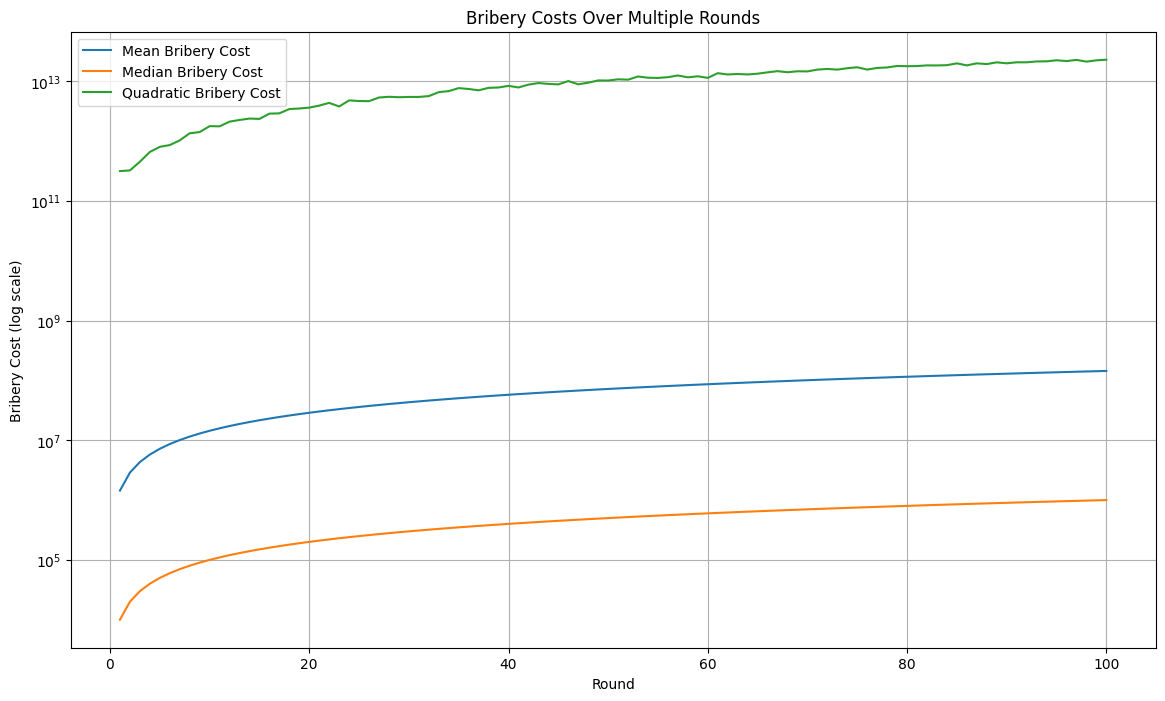

In [23]:
import matplotlib.pyplot as plt

# Plot the results with a logarithmic y-axis
def plot_bribery_costs(df):
    plt.figure(figsize=(14, 8))

    # Plot mean bribery cost
    plt.plot(df['round'], df['mean_aggregation_bribery_cost'], label='Mean Bribery Cost')

    # Plot median bribery cost
    plt.plot(df['round'], df['median_aggregation_bribery_cost'], label='Median Bribery Cost')

    # Plot quadratic bribery cost
    plt.plot(df['round'], df['quadratic_aggregation_bribery_cost'], label='Quadratic Bribery Cost')

    plt.xlabel('Round')
    plt.ylabel('Bribery Cost (log scale)')
    plt.yscale('log')
    plt.title('Bribery Costs Over Multiple Rounds')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the bribery costs
plot_bribery_costs(bribery_results)

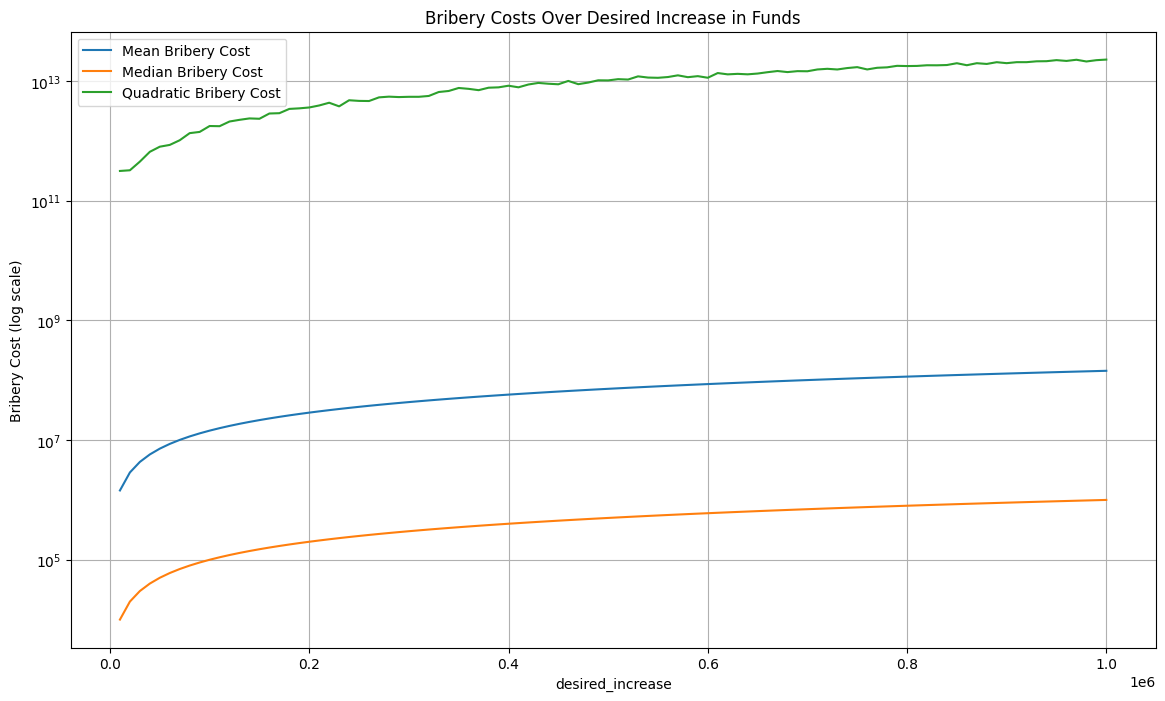

In [24]:
def plot_bribery_costs(df):
    plt.figure(figsize=(14, 8))

    # Plot mean bribery cost
    plt.plot(df['desired_increase'], df['mean_aggregation_bribery_cost'], label='Mean Bribery Cost')

    # Plot median bribery cost
    plt.plot(df['desired_increase'], df['median_aggregation_bribery_cost'], label='Median Bribery Cost')

    # Plot quadratic bribery cost
    plt.plot(df['desired_increase'], df['quadratic_aggregation_bribery_cost'], label='Quadratic Bribery Cost')

    plt.xlabel('desired_increase')
    plt.ylabel('Bribery Cost (log scale)')
    plt.yscale('log')
    plt.title('Bribery Costs Over Desired Increase in Funds')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the bribery costs
plot_bribery_costs(bribery_results)

In [25]:
summary_stats = bribery_results[['mean_aggregation_bribery_cost', 'median_aggregation_bribery_cost', 'quadratic_aggregation_bribery_cost']].describe()
print(summary_stats)

       mean_aggregation_bribery_cost  median_aggregation_bribery_cost  \
count                   1.000000e+02                       100.000000   
mean                    7.272000e+07                    505000.000000   
std                     4.177655e+07                    290114.919759   
min                     1.440000e+06                     10000.000000   
25%                     3.708000e+07                    257500.000000   
50%                     7.272000e+07                    505000.000000   
75%                     1.083600e+08                    752500.000000   
max                     1.440000e+08                   1000000.000000   

       quadratic_aggregation_bribery_cost  
count                        1.000000e+02  
mean                         1.079296e+13  
std                          6.792921e+12  
min                          3.155111e+11  
25%                          4.766306e+12  
50%                          1.048655e+13  
75%                          1.660